In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\iamsh\OneDrive\Desktop\mypythonclass\Notes\machine learning notes\11. Unsupervised Learning Clustering\1. K Means\1. Customer Segmentation or Purchase Bahaviour Segmentation\Mall_Customers.csv')

In [3]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis = 1)

In [5]:
df.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [6]:
df.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)': 'Score'}, inplace = True)

In [7]:
df.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


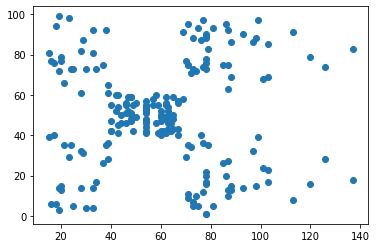

In [8]:
plt.scatter(df.Income, df.Score)

In [9]:
wcss = []

k_rng = range(1,11)

for i in k_rng:
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(df[['Income', 'Score']])
    wcss.append(km.inertia_)

C:\Users\iamsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

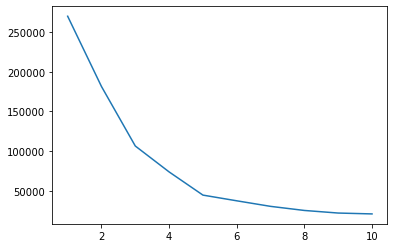

In [11]:
plt.plot(k_rng, wcss)

In [12]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_pred = km.fit_predict(df[['Income', 'Score']])
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [13]:
df['cluster'] = y_pred

In [14]:
df.head()

,Income,Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


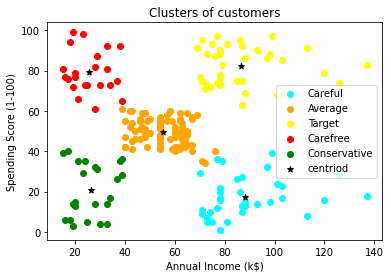

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1.Income, df1.Score, c = 'cyan', label = 'Careful')
plt.scatter(df2.Income, df2.Score, c = 'orange', label = 'Average')
plt.scatter(df3.Income, df3.Score, c = 'yellow', label = 'Target')
plt.scatter(df4.Income, df4.Score, c = 'red', label = 'Carefree')
plt.scatter(df5.Income, df5.Score, c = 'green', label = 'Conservative')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black', marker = '*', label = 'centriod')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()

In [16]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])